In [1]:
# Setup time.  Import libraries, and pick some good colors
# that are easy to discern and look good together.  Also
# set up some universal values for the plots we're going to
# generate - easier to set them once here than tinker with 
# them all individually...

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from scipy.stats import sem
import statistics

color1 = '#6359a6' # purple
color2 = '#bebada' # light purple
color3 = '#f94c39' # salmon
color4 = '#fca69c' # lightsalmon
color5 = '#8dd3c7' # teal
color6 = '#b8f5ea' # lightteal
color7 = '#fed9a6' # yellow
color8 = '#ffe8c9' # lightyellow

# *****TODO: I just figured out you can simplify this and/or make it more flexible/elegant using a cycler object.

colorlist=['#6359a6', '#f94c39', '#8dd3c7', '#fed9a6'] #just cycle thru colors
colorlist2alts=['#6359a6', '#bebada', '#f94c39', '#fca69c', '#8dd3c7', '#b8f5ea', '#fed9a6', '#ffe8c9'] #color, close relative, color 2, close relative, etc...
colorlist3alts=['#6359a6', '#837bbd', '#bebada', '#f94c39', '#ff8a7d', '#ffbab3', '#3bc4ad', '#7aebd8', '#b6fcf1', '#ffa11f', '#ffc16b', '#ffdcab'] #color, close relative, close relative, color 2, close relative, etc...

SMALL_SIZE = 14   # Defining font sizes
MEDIUM_SIZE = 22  # Defining font sizes
BIGGER_SIZE = 25  # Defining font sizes

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('legend', loc='upper left')

plt.rc('errorbar', capsize=0)            # size of caps on your error bars, in pixels (0=no caps)


In [2]:
# Google colab specific setup:  mount Google Drive for data ingest.
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

Setup Block - much of this is self-explanatory, and will change as I keep working on this.


In [5]:
setup_path = "C:/Users/jacob.t.mangini/Documents/Jupyter/Data Analysis/" #@param {type:"string"}
setup_sheet = "20220729_p20_DOE_test.xlsx" #@param {type:"string"}

In [25]:
# Run this if you need to clear things out - if you change the spreadsheet and it's not
# showing up in your results - try this before you reboot the entire kernel.
del df
del labellist
del pruned

In [6]:
# Open our spreadsheet:
# Currently, you need to make sure that there are no 
# datetime values in there - only general numbers.
# Otherwise subsequent manipulations will fail.
# I might get around to making it a bit more flexible in that 
# regard but for now make sure those time values are just
# general numbers - not date/time values.

# Also this is assuming that each column is topped with a 
# label describing the experimental condition.  This will
# also be important later because all identical labels will be
# grouped together for means and standard errors of means.

df = pd.read_excel(setup_path + setup_sheet, header=None)

# This will grab the top row and turn it into a list called "labellist"

newlabels=(df.iloc[:1,].values)
labellist=newlabels[0].tolist()

# delete that dataframe...
del df

# Now we're opening the same spreadsheet up again but this time
# it will have that label list attached to it, which will make life
# easier later on.

df = pd.read_excel(setup_path + setup_sheet, names=labellist, index_col=0)

# We're going to turn that label list into a dictionary, which will 
# get rid of duplicate entries - our next move will be to step through
# that pruned list ('pruned') and grab all matching columns to derive
# our means and sterrs from.

pruned = list(dict.fromkeys(labellist))
pruned.pop(0) # get 'mins' out of there.

avgs= []
errs= []
paramVals = []
avgs.append(df.index.values)
errs.append(df.index.values)
for p in pruned:
# what's with the '.1' and '.2'?  pandas read-excel function despises
# identical column header labels - it will automagically append .1,
# .2, .3, etc to identical ones.  So here, we're telling it to include
# those 'tags' in our search so all the columns we're after wind up
# included in the means and sterrs.
    avgs.append(df.filter(items=[p,p+'.1',p+'.2',p+'.3',p+'.4',p+'.5',p+'.6',p+'.7',p+'.8',p+'.9'],axis=1).mean(axis=1).values)
    errs.append(df.filter(items=[p,p+'.1',p+'.2',p+'.3',p+'.4',p+'.5',p+'.6',p+'.7',p+'.8',p+'.9'],axis=1).sem(axis=1).values)
    paramVals.append(df.filter(items=[p,p+'.1',p+'.2',p+'.3',p+'.4',p+'.5',p+'.6',p+'.7',p+'.8',p+'.9'],axis=1).values)
# spit out the pruned label list as quick sanity check
print(pruned)

#Sets the row and column length of the 2 dimensional array
rows, cols = 9, 101
param1 = [[0 for i in range(cols)] for j in range(rows)]
param2 = [[0 for i in range(cols)] for j in range(rows)]
param3 = [[0 for i in range(cols)] for j in range(rows)]
param4 = [[0 for i in range(cols)] for j in range(rows)]
param5 = [[0 for i in range(cols)] for j in range(rows)]

#Sets the first index of the 2D array to the time values from the file being read
param1[0] = df.index.values
param2[0] = df.index.values
param3[0] = df.index.values
param4[0] = df.index.values
param5[0] = df.index.values

#A for loop that iterates through the paramVals array and gets the values that coincide with parameter 1
for x in range(8):
    #Sets y to one greater than x so that it doesn't replace the time data
    y = x + 1
    for i in range(len(paramVals[0])):
        param1[y][i]= paramVals[0][i][x]
        
#A for loop that iterates through the paramVals array and gets the values that coincide with parameter 2
for x in range(8):
    #Sets y to one greater than x so that it doesn't replace the time data
    y = x + 1
    for i in range(len(paramVals[0])):
        param2[y][i]= paramVals[1][i][x]

#A for loop that iterates through the paramVals array and gets the values that coincide with parameter 3
for x in range(8):
    #Sets y to one greater than x so that it doesn't replace the time data
    y = x + 1
    for i in range(len(paramVals[0])):
        param3[y][i]= paramVals[2][i][x]

#A for loop that iterates through the paramVals array and gets the values that coincide with parameter 4
for x in range(8):
    #Sets y to one greater than x so that it doesn't replace the time data
    y = x + 1
    for i in range(len(paramVals[0])):
        param4[y][i]= paramVals[3][i][x]

#A for loop that iterates through the paramVals array and gets the values that coincide with parameter 5
for x in range(8):
    #Sets y to one greater than x so that it doesn't replace the time data
    y = x + 1
    for i in range(len(paramVals[0])):
        param5[y][i]= paramVals[4][i][x]
        

['P1', 'P2', 'P3', 'P4', 'P5']


In [7]:
# Turn those lists into numpy arrays...
npavg=np.asarray(avgs)
nperr=np.asarray(errs)
npp1 = np.asarray(param1)
npp2 = np.asarray(param2)
npp3 = np.asarray(param3)
npp4 = np.asarray(param4)
npp5 = np.asarray(param5)

NameError: name 'setup_org' is not defined

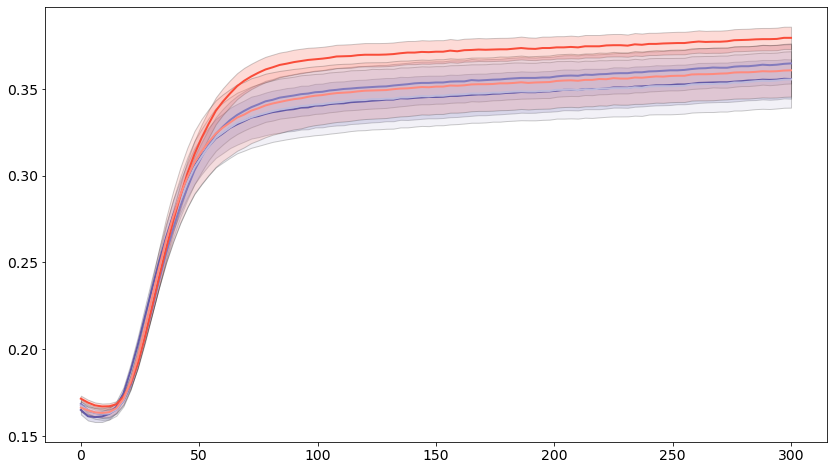

In [8]:
# Now let's make a basic plot.  Set it up, then step through the pruned
#  "experiment list" again, this time grabbing the relevant entries from
# each numpy array to construct a plot from.
# This way the same code can run on an arbitrarily sized spreadsheet. 

fig, ax = plt.subplots(figsize=(14,8))
n=1
for p in pruned:
    ax.errorbar(npavg[0], npavg[n], label=p, color=colorlist3alts[n-1], linewidth=2)
    plt.fill_between(npavg[0],npavg[n]-nperr[n], npavg[n]+nperr[n], alpha=0.2, facecolor=colorlist3alts[n-1], edgecolor='000000')
    n=n+1
    
plottitle = "Build Cycle " + ", " + setup_org + ", " + setup_whichrun + " characterization run"
plt.xlabel('Time (minutes)')
plt.ylabel('Fluorescence Intensity (RFU)')
plt.title(plottitle, fontsize=20, pad=20)
plt.legend(loc='upper left')



# And for good measure, let's have it spit out a png file...

# plt.savefig("/content/drive/MyDrive/Colab Data/test01.png", dpi=300)

initial signal:  0.15337046461268214
initial slope:  -0.003834733057904261
final signal:  0.3390998388040683
final slope:  7.490738477827541e-05
transition slope:  216.80834438012658
transition midpoint:  24.5087933415672


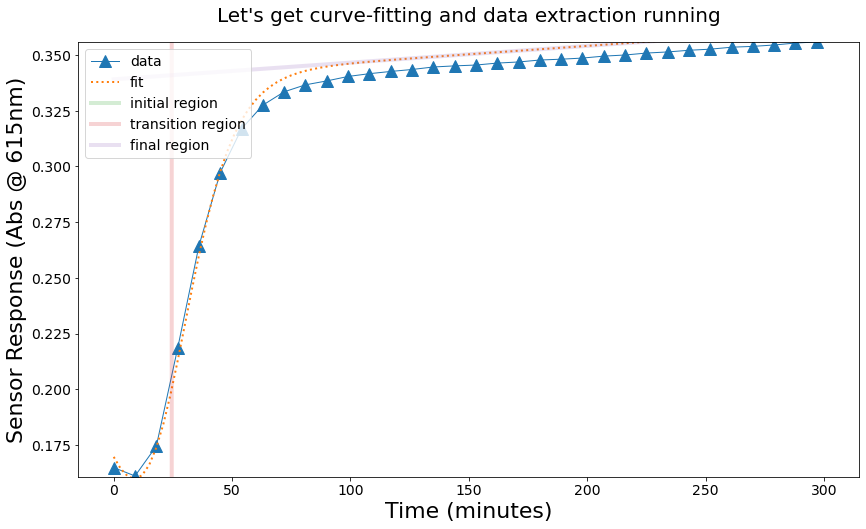

In [9]:
# setup the plot
fig, ax = plt.subplots(figsize=(14,8))

# define our function - this is the 6-component fit that should give us info we want.
def func(x, initialsignal, initialslope, finalsignal, finalslope, transitionslope, transitionmidpoint):
  observedsignal = ((initialsignal+(initialslope*x))+(finalsignal+(finalslope*x))*np.exp(-((transitionslope*(transitionmidpoint-x))/2271)))/(1+np.exp(-((transitionslope*(transitionmidpoint-x))/2271)))
  return observedsignal


# define utility functions that will plot 'diagnostic' lines for us separately describing
# the initial, transition, and final regions that we've fit.

def simplelinear(x, m1, b1):
  return (m1*x)+b1

# do the curve fit, with some initial guesses for the fit parameters.
# *********** CODE NEEDED HERE ***************
# this is an area that could use some work - I'm thinking that looking
# at the first 40 and last 40 data points and doing a simple linear 
# fit to determine the slope and intercept might really help bootstrap
# this fit so it doesn't wind up failing on weird plots.  with sane
# values for four of the components, the slope and midpoint of the
# transition regions should be easy to find without manual intervention.
pfit, pcov = curve_fit(func, npavg[0], npavg[5], p0=[1,0,166,0,300,40])

# barf out fit results.  this is also a handy reference to what's what.

print("initial signal: ",pfit[0])
print("initial slope: ",pfit[1])
print("final signal: ",pfit[2])
print("final slope: ",pfit[3])
print("transition slope: ",pfit[4])
print("transition midpoint: ",pfit[5])

tmidpointsP1 = []
#For loop that finds the transition midpoint for all 8 sets of data that coincide with parameter 1
#and assigns them to the tmidpointsP1 array
for i in range(8):
    #Sets x to one greater than i so it doesn't try to calculate the curve fit for time compared to itself
    x = i+1
    pfitP1, pcovP1 = curve_fit(func, npp1[0], npp1[x], p0=[1,0,166,0,300,40])
    tmidpointsP1.append(pfitP1[5])
    
tmidpointsP2 = []
#For loop that finds the transition midpoint for all 8 sets of data that coincide with parameter 2
#and assigns them to the tmidpointsP2 array
for i in range(8):
    #Sets x to one greater than i so it doesn't try to calculate the curve fit for time compared to itself
    x = i+1
    pfitP2, pcovP2 = curve_fit(func, npp2[0], npp2[x], p0=[1,0,166,0,300,40])
    tmidpointsP2.append(pfitP2[5])
    
tmidpointsP3 = []
#For loop that finds the transition midpoint for all 8 sets of data that coincide with parameter 3
#and assigns them to the tmidpointsP3 array
for i in range(8):
    #Sets x to one greater than i so it doesn't try to calculate the curve fit for time compared to itself
    x = i+1
    pfitP3, pcovP3 = curve_fit(func, npp3[0], npp3[x], p0=[1,0,166,0,300,40])
    tmidpointsP3.append(pfitP3[5])
    
tmidpointsP4 = []
#For loop that finds the transition midpoint for all 8 sets of data that coincide with parameter 4
#and assigns them to the tmidpointsP4 array
for i in range(8):
    #Sets x to one greater than i so it doesn't try to calculate the curve fit for time compared to itself
    x = i+1
    pfitP4, pcovP4 = curve_fit(func, npp4[0], npp4[x], p0=[1,0,166,0,300,40])
    tmidpointsP4.append(pfitP4[5])
    
tmidpointsP5 = []
#For loop that finds the transition midpoint for all 8 sets of data that coincide with parameter 5
#and assigns them to the tmidpointsP5 array
for i in range(8):
    #Sets x to one greater than i so it doesn't try to calculate the curve fit for time compared to itself
    x = i+1
    pfitP5, pcovP5 = curve_fit(func, npp5[0], npp5[x], p0=[1,0,166,0,300,40])
    tmidpointsP5.append(pfitP5[5])

# with the fit values now established, calcuate the y-intercept of the
# transition-region line so that we can plot it separately later.

midint = -(pfit[4] * pfit[5] - func(pfit[5],*pfit))

# set the limits of the plot to the max and min values of the data in the array
# this is because otherwise it will try to get the whole transition line on the 
# plot and that one usually has a bananas y-intercept.

plt.ylim(np.amin(npavg[1]),np.amax(npavg[1]))

# plot the source data

skipafewx=np.asarray(npavg[0])
skipafewy=np.asarray(npavg[1])

plt.plot(skipafewx[::3], skipafewy[::3], lw=1, marker='^', markersize=12, label='data')

# plot the fit

plt.plot(npavg[0], func(npavg[0], *pfit), lw=2, ls=":", label='fit')

# throw up three more lines, one for the initial baseline, 
# one for the transition region, one for the final baseline

plt.plot(npavg[0], simplelinear(npavg[0], pfit[1], pfit[0]), lw=4, alpha=0.2, label='initial region')
plt.plot(npavg[0], simplelinear(npavg[0], pfit[4], midint), lw=4, alpha=0.2, label='transition region')
plt.plot(npavg[0], simplelinear(npavg[0], pfit[3], pfit[2]), lw=4, alpha=0.2, label='final region')
    
# finish marking up the plot
plottitle = "Let's get curve-fitting and data extraction running"
plt.xlabel('Time (minutes)')
plt.ylabel('Sensor Response (Abs @ 615nm)')
plt.title(plottitle, fontsize=20, pad=20)
plt.legend(loc='upper left')

# And for good measure, let's have it spit out a png file...
# savepath = setup_path + "optional-output.png"
# plt.savefig(savepath, dpi=300)


In [38]:
#Sets tmidpoints to have the transition midpoints of all the parameters
tmidpoints = [tmidpointsP1, tmidpointsP2, tmidpointsP3, tmidpointsP4, tmidpointsP5]

transition_midpoints = []

#Calculates the transition midpoints of each parameter using all that parameters data,
#rather than getting the midpoints for each column of each parameter
for i in range(5):
    #Sets x to 1 greater than i so that it doesn't try to calculate the curve fit for time compared to itself
    x = i + 1
    #Calculates the curve fit
    pfit, pcov = curve_fit(func, npavg[0], npavg[x], p0=[1,0,166,0,300,40])
    
    transition_midpoints.append(pfit[5])
    
#Prints out the transition midpoints of each parameter
print(transition_midpoints)

[21.9100700470844, 25.89749119969094, 24.984916633909293, 28.140223676849022, 24.5087933415672]


1.0345966047905881
23.50052841002929


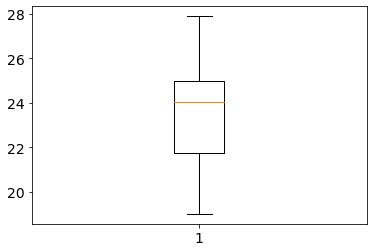

In [39]:
#Calculates than prints the standard error of the mean of the transition midpoints for parameter 1
std_err_mean = sem(tmidpointsP1)
print(std_err_mean)

#Calculates than prints the mean of the transition midpoints for parameter 1
midpoint_mean = statistics.mean(tmidpointsP1)
print(midpoint_mean)

#Plots a boxplot using parameter 1's transition midpoints
plt.boxplot(tmidpointsP1, positions=[1])

#Displays the boxplot
plt.show()

0.8672262665164949
26.498161918244023


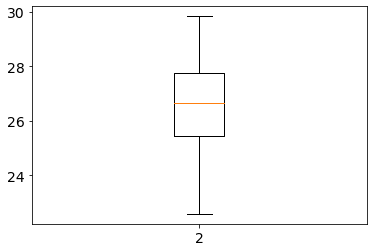

In [40]:
#Calculates than prints the standard error of the mean of the transition midpoints for parameter 2
std_err_mean = sem(tmidpointsP2)
print(std_err_mean)

#Calculates and prints the mean of the transition midpoints for parameter 2
midpoint_mean = statistics.mean(tmidpointsP2)
print(midpoint_mean)

#Plots a boxplot using parameter 2's transition midpoints
plt.boxplot(tmidpointsP2, positions=[2])

#Displays the boxplot
plt.show()

1.92793215796823
24.6911999246186


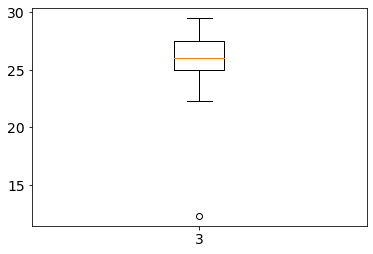

In [41]:
#Calculates and prints the standard error of the mean of the transition midpoints for parameter 3
std_err_mean = sem(tmidpointsP3)
print(std_err_mean)

#Calculates and prints the mean of the transition midpoints for parameter 3
midpoint_mean = statistics.mean(tmidpointsP3)
print(midpoint_mean)

#Plots a boxplot using parameter 3's transition midpoints
plt.boxplot(tmidpointsP3, positions=[3])

#Displays the boxplot
plt.show()

1.0243371559225596
28.24203549965759


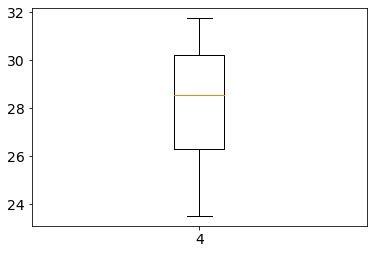

In [42]:
#Calculates and prints the standard error of the mean of the transition midpoints for parameter 4
std_err_mean = sem(tmidpointsP4)
print(std_err_mean)

#Calculates and prints the mean of the transition midpoints for parameter 4
midpoint_mean = statistics.mean(tmidpointsP4)
print(midpoint_mean)

#Plots a boxplot using parameter 4's transition midpoints
plt.boxplot(tmidpointsP4, positions=[4])

#Displays the boxplot
plt.show()

1.4558877328892388
29.10346711536909


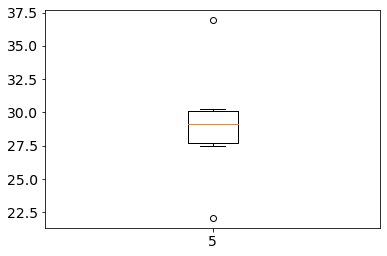

In [43]:
#Calculates and prints the standard error of the mean of the transition midpoints for parameter 5
std_err_mean = sem(tmidpointsP5)
print(std_err_mean)

#Calculates and prints the mean of the transition midpoints for parameter 5
midpoint_mean = statistics.mean(tmidpointsP5)
print(midpoint_mean)

#Plots a boxplot using parameter 5's transition midpoints
plt.boxplot(tmidpointsP5, positions=[5])

#Displays the boxplot
plt.show()

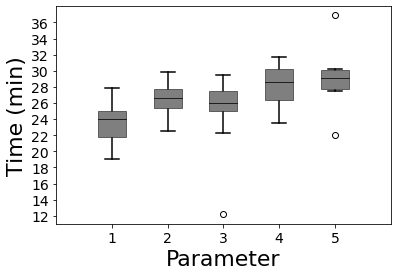

In [47]:
#Set up the plot
fig, ax = plt.subplots()

#Sets the axis labels
plt.xlabel('Parameter')
plt.ylabel('Time (min)')

#Plot the boxplot
VP = ax.boxplot(tmidpoints, positions=[1,2,3,4,5], widths=0.5, patch_artist=True,
                showmeans=False, showfliers=True,
                medianprops={"color": "black", "linewidth": 0.75},
                boxprops={"facecolor": "C7", "edgecolor": "black",
                          "linewidth": 0.5},
                whiskerprops={"color": "black", "linewidth": 1.5},
                capprops={"color": "black", "linewidth": 1.5})

#Set axis limits
ax.set(xlim=(0, 6), xticks=np.arange(1, 6),
       ylim=(11, 38), yticks=np.arange(12, 37, 2))

#Displays the boxplot
plt.show()